# Exploring Random Forests, Multi-layer Perceptron and synthetic oversampling for automatic music genre classification

## Abstract

In this study, 2 different classifiers are explored for the task of automatic music genre classification for unbalanced data set. The Classifiers studied are Multi-layer Perceptron and Random Forest Classifier. In addition, synthetic oversampling, Principal Component Analysis and Pseudo-labeling is studied for improving the efficiency of the classifiers, along with the analysis of available traing data. The purpose of the study is not to maximize efficiency but rather to establish a baseline for further improvement.



## 1. Introduction

Automatic music genre classification (AMGC) is a well know and studied problem in Music Information Retrieval. Basically, AMGC is a multiclass problem where the idea is to automatically identify a song’s genre, which is a human-created categorial label (Silla, Koerich & Kaestner, 2008).  Therefore, it is also a very interesting problem from the point of view of machine learning, pattern recognition and classification. 

AMGC is becoming increasingly relevant because of continuous production of new music and the ever-growing amount of available digitized music in the internet (Orio, 2006). It is clear that music as a business is huge, and AMGC is helpful in managing huge music libraries and for example making it easier to suggest listeners songs from categories they prefer. It has been shown that genre is an essential piece of information in organization of music collections (Aucouturier & Pachet, 2003).

Generally, the task involves in some way extracting the relevant features from the digital songs and using the features for classification (A Study on Music Genre Recognition and Classification Techniques). There are many characteristics that make up a song. The basic elements of a song are pitch, which is the perceived “highness” or “lowness” (frequency), intensity, which is the “softness” or “loudness” and timbre, which is the perceived quality of the sound that distinguishes it from other types of sources, like choir vs musical instrument (Orio, 2006). Furthermore, a song can be perceived of having certain melody, rhythm pattern and harmony (Nasridinov, & Park, 2014). These can be extracted as features and used for classification.

For AMGC, numerous classification methods have been studied. For example, Yaslan and Cataltepe (2006) explored a variety of methods such as Linear and Quadratic Discriminant Analysis, K-Nearest Neighbors and Support Vector Machines on a set of 30 different features including Mel-Frequency Cepstral Coefficients and Beat among others. The researchers also considered dimensionality reduction techniques and combining classifiers. As another example, Poria et al. (2013) studied semi-supervised learning on unlabeled data with clustering methods to improve supervised learning. Further exploration of methods is sadly out of the scope of this study, but all in all a large collection of documentation exists.




## 2. Data analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn import clone


In [3]:
# Load the training data and labels
train_data_frame = pd.read_csv('train_data.csv', header=None)
train_data = train_data_frame.values
train_labels = pd.read_csv('train_labels.csv', header=None).values.flatten()

# Load the unlabeled testing data
unlabelled_data = pd.read_csv('test_data.csv', header=None).values

# and other stuff we need
genres = list(enumerate(['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues'], 1))
labels = range(1, 11)
label_names = ['Pop_Rock', 'Electronic', 'Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']

Without going into too much detail, for the data we have a data set of 264 features. The features include certain values from MFCCs (Mel Frequency Cepstral Coefficients), chromas and rythm patterns, and these are extracted using a frame by frame decomposition of the signal.

There are songs from 10 different genres.

Before going into deeper analysis, just by taking a glance at the data we can see that there is some redundancy. Every feature vector seems to have 4 same 1e6 values, which can be easily removed with sklearn's VarianceThreshold. Same goes for the unlabelled data

In [4]:
np.set_printoptions(linewidth=400, edgeitems=20, precision=3, suppress=True)
print(train_data[:, 210:230])

print("Number of features before removing redundancy from the training data:", len(train_data[0]))
train_data = VarianceThreshold(threshold=0.0).fit_transform(train_data)
print("Number of features after removing redundancy from the training data:", len(train_data[0]))

print("Number of features before removing redundancy from the unlabelled data:", len(unlabelled_data[0]))
unlabelled_data = VarianceThreshold(threshold=0.0).fit_transform(unlabelled_data)
print("Number of features after removing redundancy unlabelled:", len(unlabelled_data[0]))

[[      1.          1.          1.          1.          1.          1.    1000000.    1000000.    1000000.    1000000.          0.002      -0.002       0.001       0.001      -0.007      -0.002       0.002       0.01        0.036       2.878]
 [      1.          1.          1.          1.          1.          1.    1000000.    1000000.    1000000.    1000000.         -0.003      -0.028       0.028       0.003       0.015       0.008      -0.002       0.015       0.024       1.183]
 [      0.998       1.          1.          1.          1.          1.    1000000.    1000000.    1000000.    1000000.         -0.002       0.007      -0.002      -0.007       0.001      -0.007      -0.001      -0.001       0.03        2.486]
 [      1.          1.          1.          1.          1.          1.    1000000.    1000000.    1000000.    1000000.         -0.027      -0.023      -0.003      -0.003      -0.004       0.003       0.002      -0.002       0.008       0.574]
 [      1.          1.      

Lets start by taking a look at the numbers of songs in each genre.

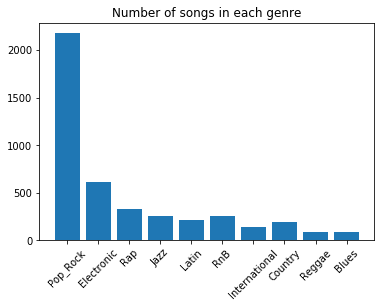

In [5]:
### Visualize song gategories ###

plt.xticks(range(1, 11), [genre[1] for genre in genres], rotation=45)
plt.title("Number of songs in each genre")
plt.bar(range(1, 11), [len(np.where(train_labels == genre[0])[0]) for genre in genres])
plt.show()

We can see that the overwhelming majority of the training data samples belongs in the pop&rock category, and Blues and Reggae have by far the least songs. This tells us that we may have to try out things like oversampling and undersampling to get better performance from our classifiers.

Next, lets take a look at the distributions of values seperately in rythm patterns, chromas and MFCCs. First lets see the box plots for each genre, with and without outliers. The red line in the box shows the median, the box extends from the lower to upper quartile values of the data and the whiskers extend to 3 times the interquartile range (3*(Q3 - Q1)). The outliers are everything outside of those values.

In [7]:
rythm_patterns = train_data[:, 0:168]
chromas = train_data[:, 168:216]
MFCCs = train_data[:, 216:]

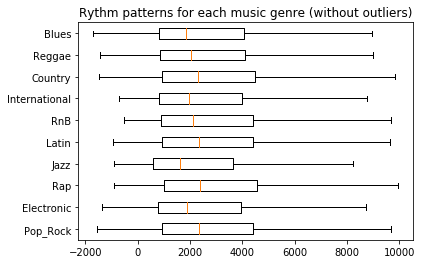

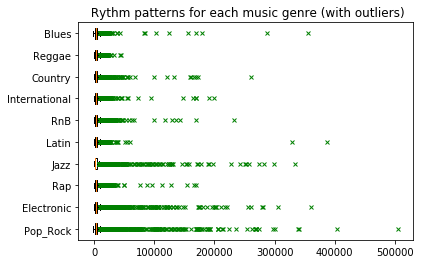

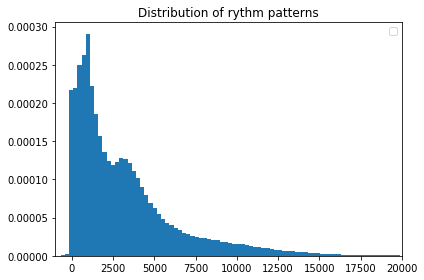

In [8]:
### Visualizing rythm patterns ###
rythm_patterns_by_genre = [rythm_patterns[np.where(train_labels == genre[0])[0]] for genre in genres]

flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none', )
plt.clf()
plt.title("Rythm patterns for each music genre (without outliers)")
plt.boxplot(rythm_patterns_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=False)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()

plt.clf()
plt.title(" Rythm patterns for each music genre (with outliers)")
plt.boxplot(rythm_patterns_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=True)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()

plt.clf()
# plt.figure(figsize=(11,4))
plt.title("Distribution of rythm patterns")
plt.hist(rythm_patterns.flatten(), 2000, density=True)
plt.xlim(-1000, 20000)

plt.tight_layout()
plt.legend()
plt.show()

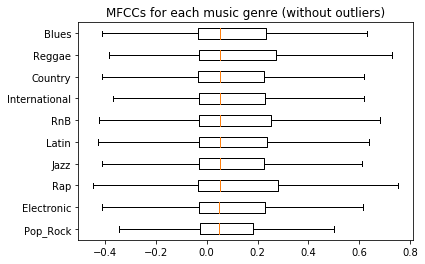

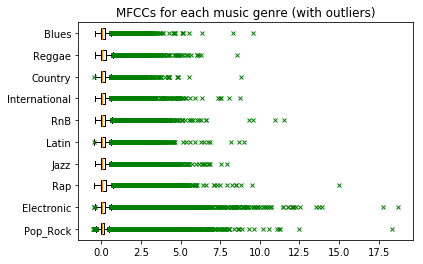

<Figure size 432x288 with 0 Axes>

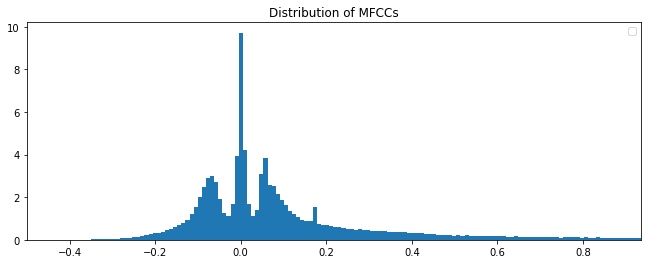

In [9]:
### Visualizing MFCCs ###
MFCCs_by_genre = [MFCCs[np.where(train_labels == genre[0])[0]] for genre in genres]

flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none', )
plt.clf()
plt.title("MFCCs for each music genre (without outliers)")
plt.boxplot(MFCCs_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=False)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()

plt.clf()
plt.title("MFCCs for each music genre (with outliers)")
plt.boxplot(MFCCs_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=True)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()

plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of MFCCs")
plt.hist(MFCCs.flatten(), 2000, density=True)
plt.xlim(-0.5, 0.05 * np.amax(MFCCs))

plt.legend()
plt.show()

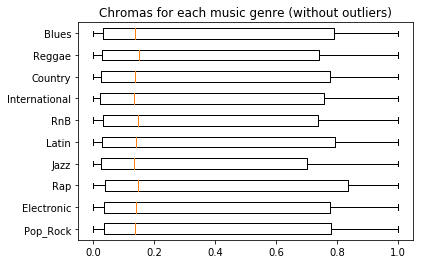

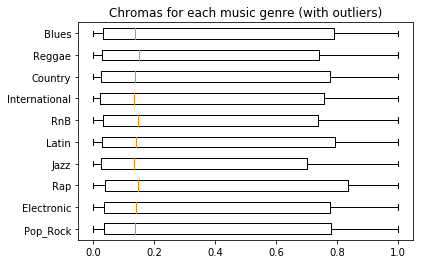

<Figure size 432x288 with 0 Axes>

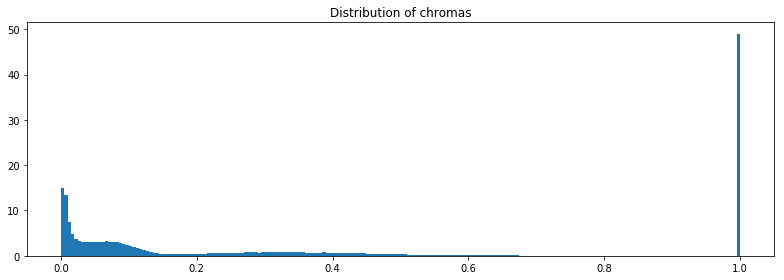

In [10]:
### Visualizing chromas ###
chromas_by_genre = [chromas[np.where(train_labels == genre[0])[0]] for genre in genres]

flierprops = dict(marker='o', markerfacecolor='green', markersize=4, linestyle='none', )
plt.clf()
plt.title("Chromas for each music genre (without outliers)")
plt.boxplot(chromas_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=False)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()

plt.clf()
plt.title("Chromas for each music genre (with outliers)")
plt.boxplot(chromas_by_genre, 0, 'gx', 0, flierprops=flierprops, showfliers=True)
plt.yticks(range(1, 11), [genre[1] for genre in genres])
plt.show()


plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of chromas")
plt.hist(chromas.flatten(), 200, density=True)
plt.tight_layout()
plt.show()

Looking at these plots, we got some interesting distributions. Generally, these seem to be some sort of multimodal distributions which might be difficult to normalize/standardize in a smart way. The first and the third look kind of like mixtures of log-normal distributions and the second one for the MFCCs looks like a mixture of normal distributions.

The ranges of values themselves are uninteresting, but the outliers seem to be quite characteristic for each genre. For example for rythm patterns Latin music has very little outliers whereas Rock/Pop have a lot. Also, the outliers might have an effect on scaling.

For chromas, a whole bunch of the values seem to be close to or exactly 1, which might point to more redundancy in the data, or that there is something weird going on there.

Usually, for machine learning, standardizing the features is an important step. There are for example methods like logistic regression that rely on distances between the data points, and there will be trouple if our features are on wildly different scales. Another example would be multilayer perceptron, for which updating the weights might be difficult if the features are not scaled.

There are many other ways of scaling for machine learning, for example normalization, min-max scaling and log-transforming. For this study we will just use normal standardization which basically means transforming the data in a way that it has 0 mean and variance of 1

In [11]:
# Standardize the training data
std_scaler = StandardScaler()
std_scaler.fit(train_data)

std_train_data = std_scaler.transform(train_data)

Lets look at the distribution after standardizing

<Figure size 432x288 with 0 Axes>

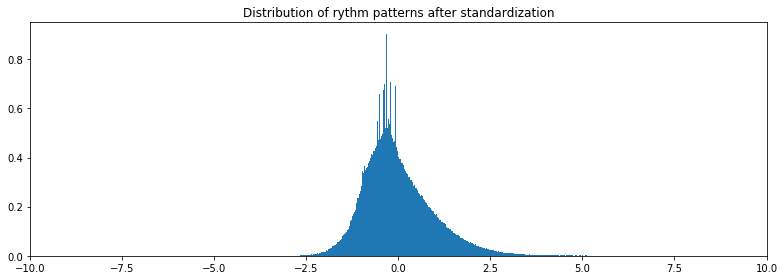

<Figure size 432x288 with 0 Axes>

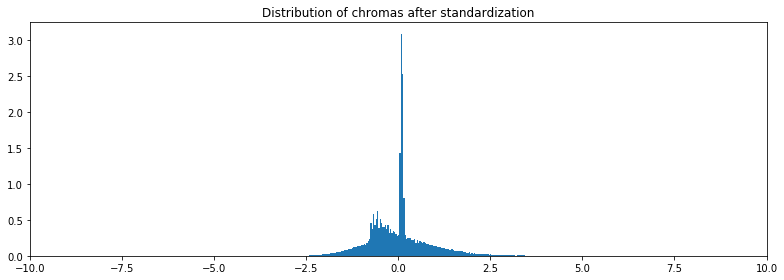

<Figure size 432x288 with 0 Axes>

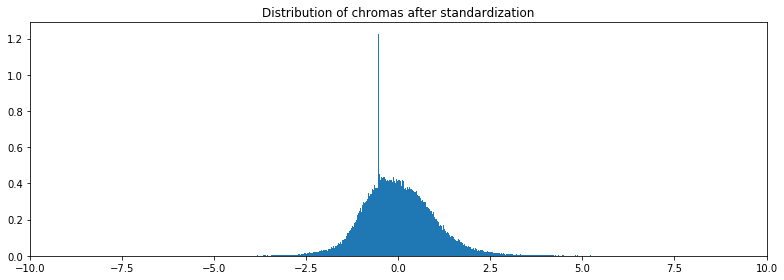

<Figure size 432x288 with 0 Axes>

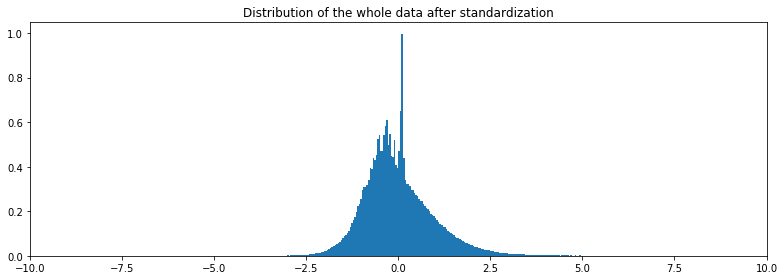

In [12]:
std_rythm_patterns = std_train_data[:, 0:168]
std_chromas = std_train_data[:, 168:216]
std_MFCCs = std_train_data[:, 216:]

plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of rythm patterns after standardization")
plt.hist(std_rythm_patterns.flatten(), 2000, density=True)
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()

plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of chromas after standardization")
plt.hist(std_chromas.flatten(), 2000, density=True)
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()

plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of chromas after standardization")
plt.hist(std_MFCCs.flatten(), 2000, density=True)
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()


plt.clf()
plt.figure(figsize=(11,4))
plt.title("Distribution of the whole data after standardization")
plt.hist(std_train_data.flatten(), 2000, density=True)
plt.xlim(-10, 10)
plt.tight_layout()
plt.show()

We can see that the scaled data at least tries to look like normally distributed, but it is somewhat skewed because of the 1's in the chromas.

### Principal Component Analysis

<Figure size 432x288 with 0 Axes>

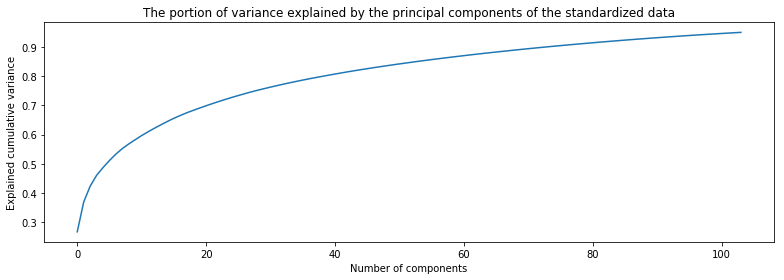

Number of components that explain 95% of the variance: 104


In [13]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='full', random_state=1, n_components=0.95, whiten=True)
pca.fit(std_train_data)
train_data_pca = pca.transform(std_train_data)

plt.clf()
plt.figure(figsize=(11, 4))
plt.title('The portion of variance explained by the principal components of the standardized data')
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of components')
plt.ylabel('Explained cumulative variance');
plt.tight_layout()
plt.show()

print("Number of components that explain 95% of the variance:", len(train_data_pca[0]))

By using the principal components instead of the data, we can reduce our feature dimension to 104 without "much loss" of information. It is hard to say how big this loss actually is in terms of classifier performance before ectually trying it.


## 3. Methods and experiments

In this study, we will be exploring tuning two very different and interesting classifiers for this task. The classifiers I have chosen out of simple interest are Random Forest Classifier and Multilayered Perceptron. We have already standardized our data and used PCA, so what is left is to test different kind of methods and hyperparameters of the classifiers to improve the efficiency.

We will be relying mostly on the Scikit-learn library, which can be installed for example from PYPI with 'pip install -U scikit-learn. sklearn: http://scikit-learn.org/stable/.

What we will be generally doing is trying out the classifiers with different parameters. We will try the classifiers with different forms of our training data like the standardized data and the PCA transformed data with less components. We will also look into synthetically oversampling our data to counteract the imbalances in the genres. Lastly, we will try to improve the efficiency further with a semi-supervised method for the unlabelled data.

If we had a better computer on our disposal we would tune our classifiers by feeding them ranges of hyperparameters and testing the performance of each combination (grid search) but in this case it is not possible because these classifiers with the data at hand are rather slow. Therefore, we will just use the poor man's method and tune the parameters "by hand", just by trying out.

Finally, we will test a semi-supervised learning method called Pseudo-labeling. Basically, the idea is that a we fit a classifier with the labeled data we have and make a prediction on the unlabeled data. We use these predictions to combine the labeled and unlabeled data and retrain our model with with the combined data set. More info on Pseudo-labeling can be found here: https://www.analyticsvidhya.com/blog/2017/09/pseudo-labelling-semi-supervised-learning-technique/

For validation we will basically be using 2 kinds of methods.

We would love to use k-fold cross validation with stratified samples. What this basically means is that we would split our data into k equally sized parts with an equal portion of Pop/Rock, Electric etc. songs in each. Then in turn each fold is used for validation while the remaining folds are used as the training set. However this is not always possible as such because we will need to oversample our data and it gets a bit too tricky and too slow. We would basically need to accomodate oversampling to all the training folds and it is just too slow, so we opt for the poor man's choice. Most of the time instead of the k-fold cross validation we will split our data into 2 stratified folds. One will the majority of the data which will be used for training and the minority will be used as validation to calculate the classification score. We will also calculate the logloss.

Lastly, simple classification score is useful but is not enough. Take for example our data which has by far mostly songs from Pop/Rock genre. A classifier classifying correctly 90% of Pop/Rock songs but classifying incorrectly most of the other songs would get a good score but this is certainly not the kind of performance one would usualky want from a classifier which is supposed to classify also 9 other genres. For that reason we will be using Confusion Matrices to see how the genres are classified. This can for example tell us if a certain genre is often classified as some other specific genre. Basically, the rows in the Confusion Matrix represent the numbers of predicted classes while the columns represent the actual ones. What we want to see is a matrix with high values mostly in the diagonal!

As a final note, the poor man's methods mentioned earlier are bad but not that bad in a sense that they will still tell us the general situation.



# Trials with ML algorithms




First we need to define two useful functions to 


In [14]:
def plot_cm_auto(classifier, data, labels, label_names):
    training_data, validation_data, training_labels, validation_labels = train_test_split(data, labels,
                                                                                          test_size=0.20,
                                                                                          stratify=labels,
                                                                                          random_state=np.random.randint(0, 1000))

    clf = clone(classifier)
    predicted_labels = clf.fit(training_data, training_labels).predict(validation_data)

    cfm = confusion_matrix(validation_labels, predicted_labels)
    cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
    
    plt.clf()
    plt.figure(figsize=(10,4))
    plt.matshow(cfm, cmap=plt.cm.Reds, interpolation='nearest', fignum=1, aspect="equal")
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks, label_names, rotation=70)
    plt.yticks(tick_marks, label_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.show()


def plot_cm(true_labels, predicted_labels, label_names):

    cfm = confusion_matrix(true_labels, predicted_labels)
    cfm = cfm.astype('float') / cfm.sum(axis=1)[:, np.newaxis]
    
    plt.clf()
    plt.figure(figsize=(10,4))
    plt.matshow(cfm, cmap=plt.cm.Reds, interpolation='nearest', fignum=1, aspect="equal")
    tick_marks = np.arange(len(label_names))
    plt.xticks(tick_marks, label_names, rotation=70)
    plt.yticks(tick_marks, label_names)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.show()

In general, Random Forests are an ensemble learning method with the idea of building a bunch of Decision Trees usually by bootstrapping (or sampling with  replacement) from the set of features. 

The most relevant hyperparameters are the number of estimators (or trees), maximum number of features to consider for each tree. There are many more hyperparameters though, which makes Random Forests a bit difficult to tune. More info on the Forests and the parameters can be found for example in Wikipedia https://en.wikipedia.org/wiki/Random_forest and in http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Lets start  with some standard hyperparameters and balanced class weights. In theory, setting the 'class_weight' attribute to balanced should counteract for the imbalanced classes


Classification percentage scores: [0.594 0.594 0.588 0.575 0.574]


Classification logloss scores: [-1.307 -1.276 -1.276 -1.293 -1.408]


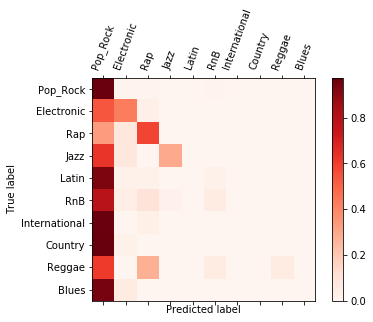

<Figure size 720x288 with 0 Axes>

In [15]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=200, max_features='auto', class_weight='balanced')

print("Classification percentage scores:", cross_val_score(rfc, std_train_data, train_labels, cv=5, n_jobs=-1))
print("Classification logloss scores:", cross_val_score(rfc,  std_train_data, train_labels, cv=5, n_jobs=-1, scoring='neg_log_loss'))
plot_cm_auto(rfc, std_train_data, train_labels, label_names)

We can see that balanced class weights option doesn't actually do anything for us and the classification is heavily skewed towards the most numerous genre. Therefore, we need to think about over/undersampling our data to get rid of the imbalances.

Luckily there is a library just for that, "imabalced learn" (https://imbalanced-learn.readthedocs.io/en/stable/), which contains a method to create synthetic samples to fill out the minor genres. It can be installed from PYPI with 'pip install -U imbalanced-learn'

In [17]:
from imblearn.over_sampling import SMOTE
sampler1 = SMOTE(random_state=12)
sampler2 = SMOTE(random_state=12)

#Split our standardized labelled data to 4/5 <--> 1/5
train_data_80, val_data_20, train_labels_80, val_labels_20 = train_test_split(std_train_data, 
                                                                              train_labels, 
                                                                              test_size=0.2, 
                                                                              random_state=12)

#Same for PCA
train_data_pca_80, val_data_pca_20, train_labels_pca_80, val_labels_pca_20 = train_test_split(train_data_pca, 
                                                                                                 train_labels, 
                                                                                                 test_size=0.2, 
                                                                                                 random_state=12)

#Oversample
ovrs_train_data, ovrs_train_labels = sampler1.fit_sample(train_data_80, train_labels_80)
ovrs_train_data_pca, ovrs_train_labels_pca = sampler2.fit_sample(train_data_pca_80, train_labels_pca_80)

Then lets try again with the oversampled data

Score of the standard data prediction: 0.5967926689576174
Logloss of the standardized data prediction for rfc: 1.3712260205076947


Score of the PCA data prediction: 0.6082474226804123
Logloss of the PCA data prediction for rfc_pca: 1.5814351257826542


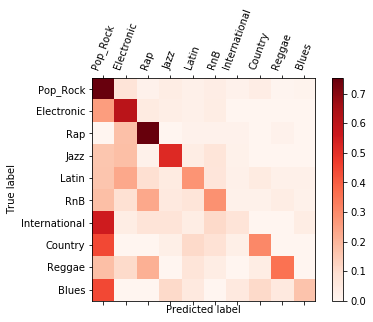

<Figure size 720x288 with 0 Axes>

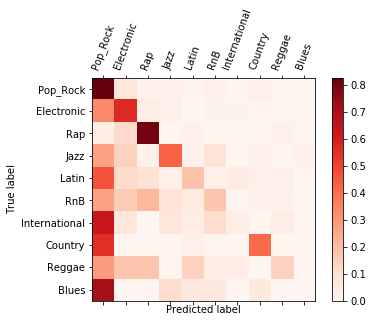

<Figure size 720x288 with 0 Axes>

In [18]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=300, max_features='auto')
rfc_pca = RandomForestClassifier(n_jobs=-1, n_estimators=300, max_features='auto')

# Fit our models with the oversampled data
rfc.fit(ovrs_train_data, ovrs_train_labels)
rfc_pca.fit(ovrs_train_data_pca, ovrs_train_labels_pca)

# Scores of the predictions on the validation data we left untouched
print("Score of the standard data prediction:", rfc.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for rfc:", log_loss(val_labels_20, rfc.predict_proba(val_data_20)))
print("Score of the PCA data prediction:", rfc_pca.score(val_data_pca_20, val_labels_pca_20))
print("Logloss of the PCA data prediction for rfc_pca:", log_loss(val_labels_20, rfc_pca.predict_proba(val_data_pca_20)))

# And confusion matrices for both with the validation data
plot_cm(val_labels_20, rfc.predict(val_data_20), label_names)
plot_cm(val_labels_pca_20, rfc_pca.predict(val_data_pca_20), label_names)

Now we get much more better results although there is still some bias that can be seen from the matrices. We can also see that using the principal components (which have a lot less features) seem to have little effect. Since this classifier is quite slow but not super slow, it might not be the greatest idea to use the PCA. If our data set and the number of features would be gigantic then we could definitely consider more.

We would love to do a grid search on the hyperparameters on this classifier but sadly it takes too long to get anything interesting out of it, so just fiddling with the parameters by hand we get the following few interesting classifiers


Score of the prediction for rfc1: 0.5315005727376861


Logloss of the prediction for rfc1: 1.5542637826532422


Score of the prediction for rfc2: 0.5441008018327605


Logloss of the prediction for rfc2: 1.5341305296336585


Score of the prediction for rfc3: 0.561282932416953


Logloss of the prediction for rfc3: 1.4750345904601976


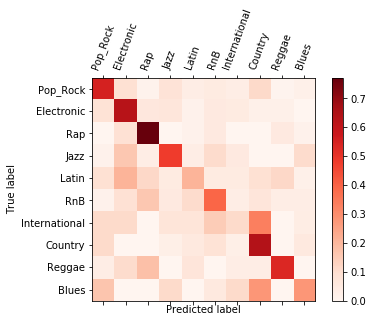

<Figure size 720x288 with 0 Axes>

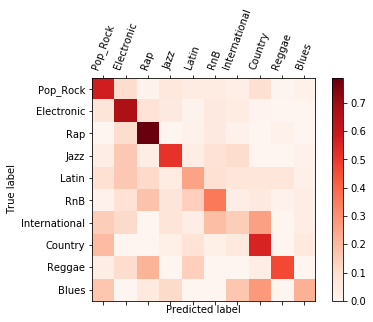

<Figure size 720x288 with 0 Axes>

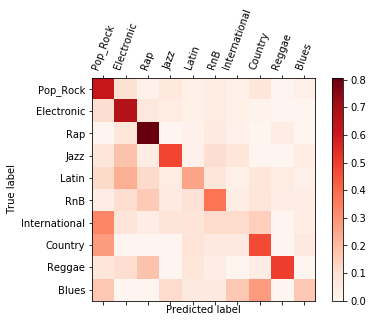

<Figure size 720x288 with 0 Axes>

In [19]:
rfc1 = RandomForestClassifier(n_jobs=-1, n_estimators=300, max_features='auto', min_samples_split=30, min_samples_leaf=30, max_depth=50)
rfc2 = RandomForestClassifier(n_jobs=-1, n_estimators=300, max_features='auto', min_samples_split=70, min_samples_leaf=6, max_depth=150)
rfc3 = RandomForestClassifier(n_jobs=-1, n_estimators=300, max_features='auto', min_samples_split=30, min_samples_leaf=8, max_depth=400)
rfc1.fit(ovrs_train_data, ovrs_train_labels)
rfc2.fit(ovrs_train_data, ovrs_train_labels)
rfc3.fit(ovrs_train_data, ovrs_train_labels)

print("Score of the prediction for rfc1:", rfc1.score(val_data_20, val_labels_20))
print("Logloss of the prediction for rfc1:", log_loss(val_labels_20, rfc1.predict_proba(val_data_20)))
print("Score of the prediction for rfc2:", rfc2.score(val_data_20, val_labels_20))
print("Logloss of the prediction for rfc2:", log_loss(val_labels_20, rfc2.predict_proba(val_data_20)))
print("Score of the prediction for rfc3:", rfc3.score(val_data_20, val_labels_20))
print("Logloss of the prediction for rfc3:", log_loss(val_labels_20, rfc3.predict_proba(val_data_20)))

plot_cm(val_labels_20, rfc1.predict(val_data_20), label_names)
plot_cm(val_labels_20, rfc2.predict(val_data_20), label_names)
plot_cm(val_labels_20, rfc3.predict(val_data_20), label_names)

These models are decent with the training data they had. They should perfom slightly better if they had access to the full amount of the training data.

Without going into too much detail, Multilayer Perceptron is a feedforward artifical neural network which uses backpropagation for learning. It's made of layers of "neurons" with a nonlinear activation functions, and it can learn non-linear models. More theoretical and practical information can be found for example in http://scikit-learn.org/stable/modules/neural_networks_supervised.html and in http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html.

The most meaningful hyperparameters of the multilayer perceptron are sizes of the hidden layers, the type of the activation function and the alpha-parameter.

I already know that the multilayer perceptron suffers from the same problem as the random forest classifier, namely that it can't adjust to imbalanced data well. Therefore, let's go straight on to using the same oversampled data and see how it performs without adjusting many parameters. A grid search on a range of all sorts of values would be great again, but it's too slow for that.

Score of the standardized data prediction for mlp: 0.6071019473081328
Logloss of the standardized data prediction for mlp: 3.3163954359255268
Score of the PCA data prediction for mlp_pca: 0.5910652920962199
Logloss of the standardized data prediction for mlp_pca: 3.6688423488656032


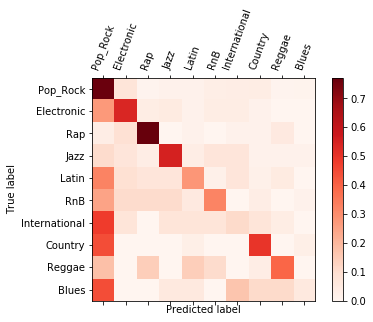

<Figure size 720x288 with 0 Axes>

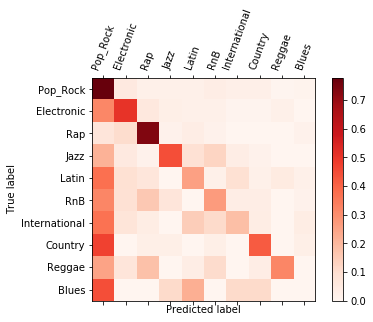

<Figure size 720x288 with 0 Axes>

In [20]:
mlp = MLPClassifier(max_iter=1000)
mlp_pca = MLPClassifier(max_iter=1000)

mlp.fit(ovrs_train_data, ovrs_train_labels)
mlp_pca.fit(ovrs_train_data_pca, ovrs_train_labels_pca)

print("Score of the standardized data prediction for mlp:", mlp.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp:", log_loss(val_labels_20, mlp.predict_proba(val_data_20)))
print("Score of the PCA data prediction for mlp_pca:", mlp_pca.score(val_data_pca_20, val_labels_pca_20))
print("Logloss of the standardized data prediction for mlp_pca:", log_loss(val_labels_pca_20, mlp_pca.predict_proba(val_data_pca_20)))

plot_cm(val_labels_20, mlp.predict(val_data_20), label_names)
plot_cm(val_labels_20, mlp_pca.predict(val_data_pca_20), label_names)

Not bad, we get a bit better score and a decent looking matrix. The PCA in this case seems to perform slightly worse. Lets try to make it better using only the standard data.

Score of the standardized data prediction for mlp1: 0.5486827033218786
Logloss of the standardized data prediction for mlp1: 3.5564692396204776
Score of the standardized data prediction for mlp2: 0.5395189003436426
Logloss of the standardized data prediction for mlp2: 4.061244271241161
Score of the standardized data prediction for mlp3: 0.5498281786941581
Logloss of the standardized data prediction for mlp3: 4.055832510550594


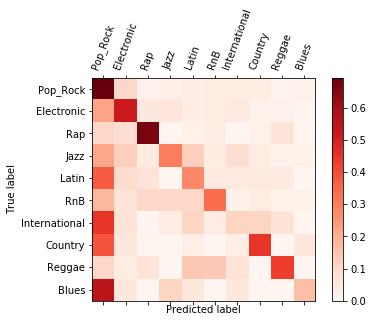

<Figure size 720x288 with 0 Axes>

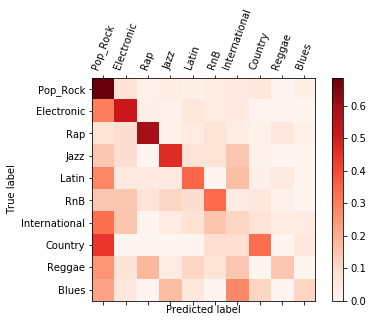

<Figure size 720x288 with 0 Axes>

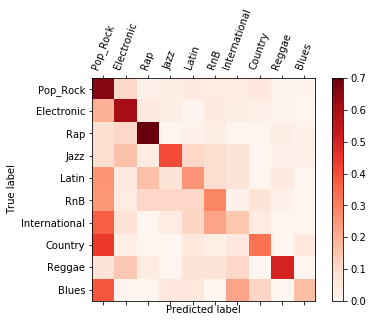

<Figure size 720x288 with 0 Axes>

In [23]:
mlp1 = MLPClassifier(max_iter=100, hidden_layer_sizes=(30,30), alpha=1, solver='lbfgs', learning_rate='adaptive', activation='tanh')
mlp2 = MLPClassifier(max_iter=100, hidden_layer_sizes=(30,30), alpha=0.1, solver='lbfgs', learning_rate='adaptive', activation='tanh')
mlp3 = MLPClassifier(max_iter=100, hidden_layer_sizes=(30,30), alpha=0.01, solver='lbfgs', learning_rate='adaptive', activation='tanh')
mlp1.fit(ovrs_train_data, ovrs_train_labels)
mlp2.fit(ovrs_train_data, ovrs_train_labels)
mlp3.fit(ovrs_train_data, ovrs_train_labels)

print("Score of the standardized data prediction for mlp1:", mlp1.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp1:", log_loss(val_labels_20, mlp1.predict_proba(val_data_20)))
print("Score of the standardized data prediction for mlp2:", mlp2.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp2:", log_loss(val_labels_20, mlp2.predict_proba(val_data_20)))
print("Score of the standardized data prediction for mlp3:", mlp3.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp3:", log_loss(val_labels_20, mlp3.predict_proba(val_data_20)))

plot_cm(val_labels_20, mlp1.predict(val_data_20), label_names)
plot_cm(val_labels_20, mlp2.predict(val_data_20), label_names)
plot_cm(val_labels_20, mlp3.predict(val_data_20), label_names)

In this case, With a larger alpha-value the classifier seems to generalize better.

With some fiddling around I get these parameters

Score of the standardized data prediction for mlp: 0.5945017182130584
Logloss of the standardized data prediction for mlp: 1.3256084851215677


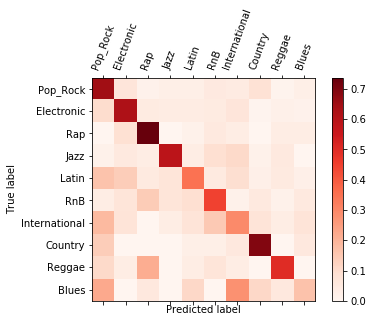

<Figure size 720x288 with 0 Axes>

In [25]:
mlp = MLPClassifier(max_iter=100, hidden_layer_sizes=(50,), alpha=90, solver='lbfgs', activation='tanh')
mlp.fit(ovrs_train_data, ovrs_train_labels)

print("Score of the standardized data prediction for mlp:", mlp.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp:", log_loss(val_labels_20, mlp.predict_proba(val_data_20)))
plot_cm(val_labels_20, mlp.predict(val_data_20), label_names)


Note, that this is still quite toned-down version. We could increase the number of the neurons but this would make our model really slow.

Next, lets try Pseudo Labelling with our best classifiers

Score of the standardized data prediction for mlp: 0.6071019473081328
Logloss of the standardized data prediction for mlp: 1.4255861448479683


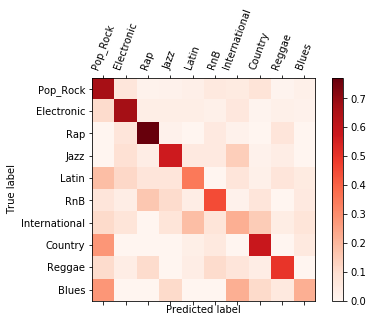

<Figure size 720x288 with 0 Axes>

In [26]:
mlp1 = MLPClassifier(max_iter=100, hidden_layer_sizes=(50, ), alpha=90, solver='lbfgs', activation='tanh')
mlp2 = MLPClassifier(max_iter=100, hidden_layer_sizes=(50, ), alpha=90, solver='lbfgs', activation='tanh')

# First, lets scale the unlabelled testing data with the same scaler we used before
std_unlabelled_data = std_scaler.transform(unlabelled_data)

mlp1.fit(ovrs_train_data, ovrs_train_labels)
predictions = mlp1.predict(std_unlabelled_data)

extended_data = np.concatenate((ovrs_train_data, std_unlabelled_data), axis=0)
extended_train_labels = np.concatenate((ovrs_train_labels, predictions))

mlp2.fit(extended_data, extended_train_labels)
print("Score of the standardized data prediction for mlp:", mlp2.score(val_data_20, val_labels_20))
print("Logloss of the standardized data prediction for mlp:", log_loss(val_labels_20, mlp2.predict_proba(val_data_20)))
plot_cm(val_labels_20, mlp2.predict(val_data_20), label_names)



## 4. Results of the study and Kaggle Competition

In the previous section we tested Random Forest Classifiers and Multi-layered Perceptrons with various hyperparameters and datasets. For the Random Forests we were able to achieve scores approximately around 0.56 and logloss (measured with the sklearn's log_loss function) of around 1.4. The Perceptron performed slightly better with a score of aproximately 0.6 and logloss of 1.4. Using Pseudo-labeling we slightly improved the classification score.

However, in the Kaggle competition the Perceptron gets a sligthly lower classification score of 0.58.The Perceptron with Pseudo-labeling gets a classification score of 0.59 which is an improvement, but still lower than the score we achieved. The logloss for Kaggle with the Pseudo-labeled Perceptron was about 0.4, but this is possibly because Kaggle calculates logloss in a different way or I did something wrong.




## 5. Discussion/Conclusions

In short, the results compared to the Kaggle competition and literature are not that great, but there are also some encouraging aspects. For example looking at the literature, Ali and Siddiqui (2017) were able to reach an accuracy of 0.642 with Support Vector Machines. Even though the genres and features studied by the reasearchers were not the same as for this study, it shows that there is much to improve. Same goes for the Kaggle competition leaderboards.

There are numerous possible reasons why to the low performance. Firstly, looking at the distributions of the data and the standardized data we can see that there is still very likely to be some redundant data there. It may also need a more careful and robust scaling methods because of the outliers in the data, although this might not greatly affect these classifiers considered in this study. Secondly, the classifiers I chose to explore are difficult to use in a sense that they are slow which makes it too time-consuming to do a perfect tune-up. I'm sure there are much better combinations of hyperparameters. Perhaps with more time and more CPU power I could have done an exhausting grid search. Thirdly, the chosen classifiers may not the best options for this task. There are for example classifiers that can adjust to the imbalanced data in a different way than oversampling. Lastly, the used oversampling strategy might have overfitted the models in a way that resulted lower Kaggle score. 

This study is very limited in terms of used methods, so there are quite a few things left to explore aside from just different type of classifiers and parameters. Firstly, it would be interesting to see the effects of different ways of scaling and filtering the data. For example one could try the many methods of choosing the best available features and using different scaling methods like min-max scaling. There are also other ways of doing reducing dimensions with PCA. Secondly, one could try different kinds of over/undersampling strategies. The oversampling strategy used in this study showed that it may not be the best. Thirdly, there exist many semi-supervised learning methods such as Label Propagation which was not tried in this study.

All in all, this was an interesting study and I think it at least shed light into finding correct methods to use the studied classifiers. Perhaps the most valuable lesson for me personally was to dive in to the world of machine learning, read all sorts of interesting articles and tutorials and test things in practice. Perhaps the best lessons learned from this study was to accomodate to unbalanced data set, and more specifically the importance of correct validation methods. For example, as mentioned earlier, it is important not to look at only the simple scores but to also make sure that the classifier generalizes well. Another good lesson already mentioned is to always keep a seperate and clean validation set, which is untouched by for example oversampling. Having said this, I think this study was quite successful overall and I had fun.




## 6. References

Ali, M. A., & Siddiqui, Z. A. (2017). Automatic Music Genres Classification using Machine Learning. INTERNATIONAL JOURNAL OF ADVANCED COMPUTER SCIENCE AND APPLICATIONS, 8(8), 337-344.

Aucouturier, J. J., & Pachet, F. (2003). Representing musical genre: A state of the art. Journal of new music research, 32(1), 83-93.
Silla, C. N., Koerich, A. L., & Kaestner, C. A. (2008). A machine learning approach to automatic music genre classification. Journal of the Brazilian Computer Society, 14(3), 7-18.

Orio, N. (2006). Music retrieval: A tutorial and review. Foundations and Trends® in Information Retrieval, 1(1), 1-90.

Nasridinov, A., & Park, Y. H. (2014). A study on music genre recognition and classification techniques. International Journal of Multimedia and Ubiquitous Engineering, 9(4), 31-42.

Poria, S., Gelbukh, A., Hussain, A., Bandyopadhyay, S., & Howard, N. (2013). Music genre classification: A semi-supervised approach. In Mexican Conference on Pattern Recognition (pp. 254-263). Springer, Berlin, Heidelberg.

Yaslan, Y., & Cataltepe, Z. (2006, August). Audio music genre classification using different classifiers and feature selection methods. In Pattern Recognition, 2006. ICPR 2006. 18th International Conference on (Vol. 2, pp. 573-576). IEEE.



